### Figure 2
 

In [4]:
## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import metrics
from scipy import stats

## All areas

In [5]:
# paths to load data
pathData = '../data/'
pathFln = '../data/Connectome/Kennedy.mat'

# Number of areas
Nareas=19
# Numver of trials
Ntrials=10

#### FLN

In [6]:
# Structural Connectivity
# Fln
# load FLNs
conn = loadmat(pathFln)
fln=conn['Fln']

#### GPDC Total

In [7]:
# Gpdc (Downsample 1kHz)

# matrix to store gpdc values
gpdcMatrixAUC=np.zeros((Nareas,Nareas,Ntrials)) #(i->j)
gpdcMatrixMean=np.zeros((Nareas,Nareas,Ntrials)) #(i->j)


for i in range(Ntrials):
    #  load GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    # gpdc values
    gpdc=data['arr_1']
    # take mean of gpdc 
    gpdcMatrixMean[:,:,i]=np.mean(gpdc[:,:,:],axis=2).T
    
    # take auc of gpdc
    for k in range(Nareas):
        for l in range(Nareas):
            gpdcMatrixAUC[k,l,i]=metrics.auc(data['arr_0'],gpdc[l,k,:])


#### FLN vs GPDC Total peak   (All FLN including those equal to zero)

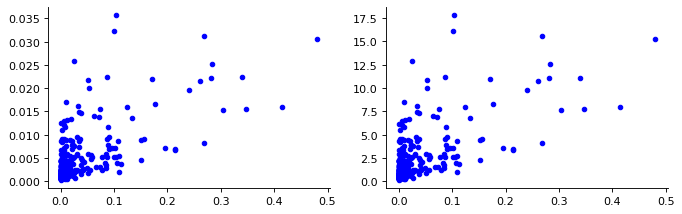

In [8]:
# define figure size
fig=plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')

# remove right and top axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# correlation
listCorrelationMean=[]
listCorrelationAuc=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    # list to store FLN values
    listFln=[]
    # list to store GPDC values 
    listGpdcAuc=[]
    listGpdcMean=[]
    
    for i in range(Nareas):
        for j in range(Nareas):
            if i!=j:

                listFln.append(fln[i,j])
                listGpdcMean.append(gpdcMatrixMean[i,j,seed])
                listGpdcAuc.append(gpdcMatrixAUC[i,j,seed])
    
    if seed==4:
        # Plot scatter plot
        plt.subplot(121)
        plt.plot(listFln,listGpdcMean,'.b', markersize=8)
        plt.subplot(122)
        plt.plot(listFln,listGpdcAuc,'.b', markersize=8)
    
    listCorrelationMean.append(stats.pearsonr(listFln,listGpdcMean)[0])
    listCorrelationAuc.append(stats.pearsonr(listFln,listGpdcAuc)[0])


#### Average correlation between FLN and GPDC

In [10]:
df=pd.DataFrame({'AUC':listCorrelationAuc,'Mean':listCorrelationMean })

([<matplotlib.axis.YTick at 0x7f432429e550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

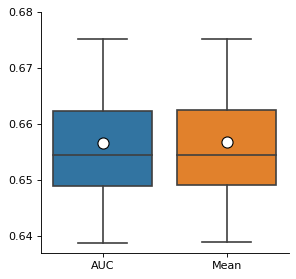

In [11]:
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.boxplot(data=df,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yticks([0.64,0.65,0.66,0.67,0.68])